# Word Cloud 

In [1]:
import pandas as pd 
import nltk,spacy,re
from  nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df = pd.read_csv('Tweets-A.csv')
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\koderrex\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\koderrex\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\koderrex\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tweet_id,airline_sentiment,name,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,cairdin,@VirginAmerica What @dhepburn said.,NaN,24/02/15 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,jnardino,@VirginAmerica plus you've added commercials t...,NaN,24/02/15 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,yvonnalynn,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/15 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,jnardino,@VirginAmerica it's really aggressive to blast...,NaN,24/02/15 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,jnardino,@VirginAmerica and it's a really big bad thing...,NaN,24/02/15 11:14,NaN,Pacific Time (US & Canada)


In [2]:
#function for treatment of verbs form and apostrophe in text
def decontracted(phrase):
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


In [3]:
#TweetId is primary key.......Tweet_cord has more than 80% of missing rows so dropped it
df_data = df.copy()
df_data.drop(columns=['tweet_id','tweet_coord'],inplace=True)

#Column ['Text'] pre-processing by converting it to lower case
df_data.text = df_data.text.apply(lambda text:text.lower() if type(text) == str else text)

#HREF Links Removal
df_data.text = df_data.text.apply(lambda text: re.compile(r'https?://\S+|www\.\S+').sub(r'',text))
# df_data.text = df_data.text.apply(lambda text: re.compile(r'http?://\S+|www\.\S+').sub(r'',text))
#HTML Text Removal
df_data.text = df_data.text.apply(lambda text: BeautifulSoup(text,'html.parser').text)

#HashTags Separation And Merging
df_data['hashtags'] = [ [ tag[1: ] for tag in i.split() if tag.startswith('#') ] for i in df_data.text ]

#@Entities Separation And Merging
df_data['tags'] = [ [ ent[1: ] for ent in i.split() if ent.startswith("@") ] for i in df_data.text ]

#Decontraction
df_data.text = df_data.text.apply(lambda x :decontracted(x))

# @Words Removal from text
df_data.text = [ " ".join([ sent for sent in text.split(" ") if sent.startswith("@") == False  ]) for text in df_data.text]

#Punctuations Removal
df_data.text = df_data.text.str.replace('[^\w\s]','')

#StopWords Removal
df_data.text = [ " ".join(([word for word in word_tokenize(i) if not word in list((stopwords.words('english')))]))  for i in df_data.text ]

#Lemmatization - Aiming to remove inflectional endings and return the base meaning or dictionary meaning of a word also known as lemma
df_data.text = df_data.text.apply(lambda text: lemmatizer.lemmatize(text))

#Tokenization - We'll be using white space tokenizer as other tokenizers separate on condition which doesn't help us portray meaninng of words
df_data['tokenised_text'] = [[word for word in word_tokenize(i)] for i in df_data.text]


In [4]:
df_data.head()

,airline_sentiment,name,text,tweet_created,tweet_location,user_timezone,hashtags,tags,tokenised_text
0,neutral,cairdin,said,24/02/15 11:35,NaN,Eastern Time (US & Canada),[],"[virginamerica, dhepburn]",[said]
1,positive,jnardino,plus added commercials experience tacky,24/02/15 11:15,NaN,Pacific Time (US & Canada),[],[virginamerica],"[plus, added, commercials, experience, tacky]"
2,neutral,yvonnalynn,today must mean need take another trip,24/02/15 11:15,Lets Play,Central Time (US & Canada),[],[virginamerica],"[today, must, mean, need, take, another, trip]"
3,negative,jnardino,really aggressive blast obnoxious entertainmen...,24/02/15 11:15,NaN,Pacific Time (US & Canada),[],[virginamerica],"[really, aggressive, blast, obnoxious, enterta..."
4,negative,jnardino,really big bad thing,24/02/15 11:14,NaN,Pacific Time (US & Canada),[],[virginamerica],"[really, big, bad, thing]"


In [5]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np
import matplotlib.pyplot as plt
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/F/O/V/V/E/w/tweeter-bird-hi.png', stream=True).raw))


# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 612, height = 612, background_color='white', stopwords=STOPWORDS, mask=mask).generate(words)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='black')
    print("\n")
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    


# Most Accuring Words In Whole Text

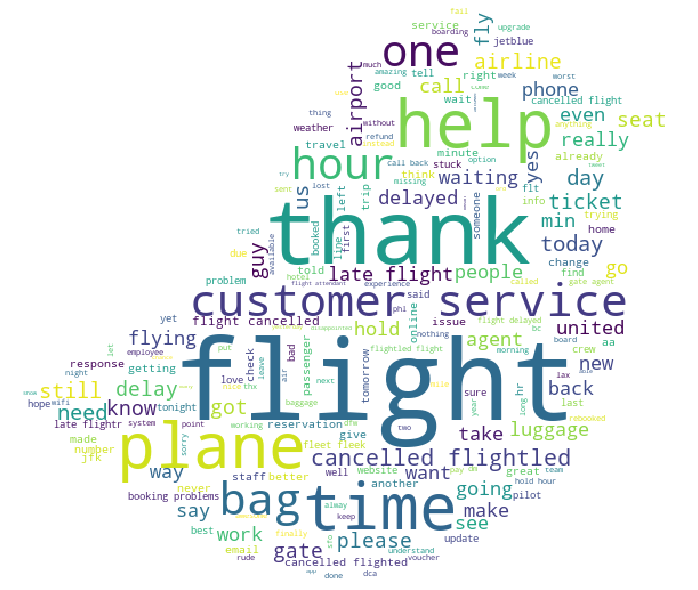

In [24]:
#Run the following to generate your wordcloud
words = ' '.join([twts for twts in df_data.text])
# print(words)
generate_wordcloud(words, mask)

In [20]:
# df["airline_sentiment"].value_counts()

# Most Accuring Word In Negative labeled Text

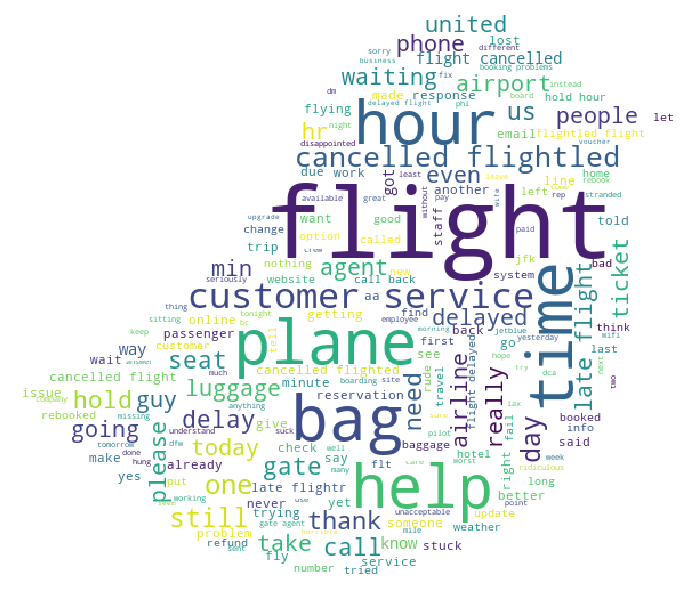

In [25]:
new_row=df_data.loc[df_data["airline_sentiment"] == "negative", 'text']
words2 = ' '.join([twts for twts in new_row])
# print(words2)
generate_wordcloud(words2, mask)
    

# Most Accuring Word In Positive labeled Text

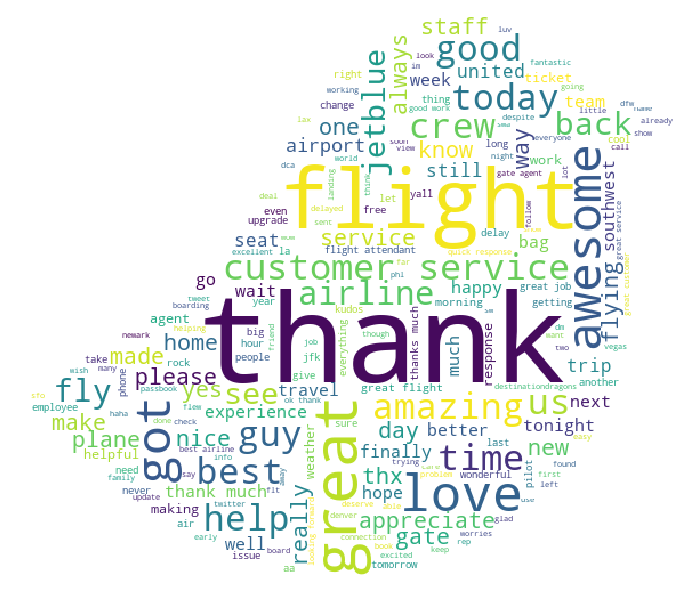

In [26]:
new_row2=df_data.loc[df_data["airline_sentiment"] == "positive", 'text']
# print(new_row2)
words3 = ' '.join([twts for twts in new_row2])
generate_wordcloud(words3, mask)